In [1]:
import csv
import collections

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# %matplotlib widget

In [2]:
def get_results(num_players, num_coins=3):
    f_name = f'results/result-num_{num_players}-coins_{num_coins}.csv'
    with open(f_name, 'r') as f:
        reader = csv.DictReader(f)
        rows = []
        for row in reader:
            rows.append(row)
        return rows
    
def collect_results(players_range, coins_range):
    data = {}
    for players in players_range:
        for coins in coins_range:
            data[(coins, players)] = get_results(players, coins)
    return data

In [15]:
def plot_metric(results, metric, players_range, num_coins):
    for player in players_range:
        c = collections.Counter()
        for value in [int(r[metric]) for r in results[(num_coins, player)]]:
            c[value] += 1
        max_num = max(c.keys()) + 1
        min_num = min(c.keys())
        x = range(min_num, max_num)
        y = [c[i] for i in x]
        plt.plot(x, y, label=f'Players: {player}')
    plt.yscale('linear')
    plt.xlabel(metric)
    plt.ylabel('# of times / 10k')
    plt.legend()
    plt.show()

In [16]:
players = range(2, 15 + 1)
coins = 3
results = collect_results(range(2, 15 + 1), range(coins, coins + 1))

In [17]:
# 3D setup
# fig = plt.figure()
# ax = fig.gca(projections='3d')

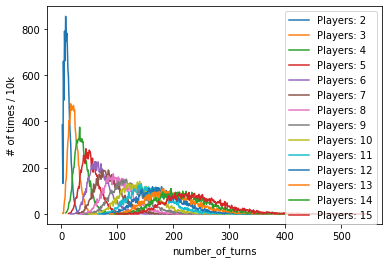

In [18]:
plot_metric(results, 'number_of_turns', players, coins)

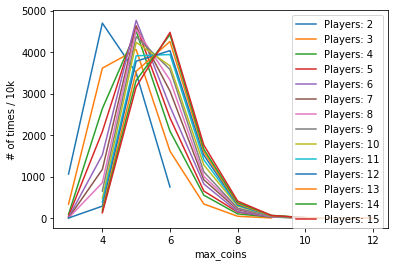

In [19]:
plot_metric(results, 'max_coins', players, coins)

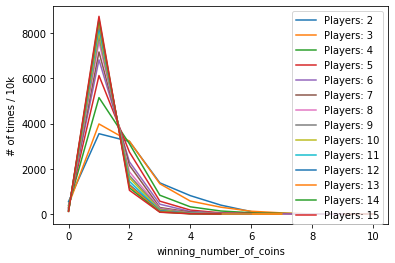

In [20]:
plot_metric(results, 'winning_number_of_coins', players, coins)

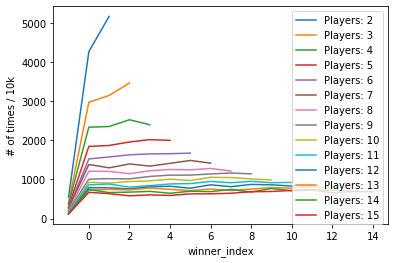

In [21]:
plot_metric(results, 'winner_index', players, coins)